#  Exploratory Data Analysis

Data Understanding

Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

Verify data quality: How clean/dirty is the data? Document any quality issues.

In [1]:
#Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
# Read the CSV back into a DataFrame
try:
    df_raw = pd.read_csv('data/row_data.csv')
    print("Data loaded successfully from CSV.")
except Exception as e:
    print(f"""Error reading CSV into DataFrame, 
          Check 01_Predict_Students_Dropout_Get_Raw_Data notebook: {e}""")
    raise

Data loaded successfully from CSV.


In [3]:
#print columns
df_raw.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [5]:
# Display the df_raw DataFrame
display(df_raw.head(5))  # Display the df_raw DataFrame in a Jupyter Notebook or interactive environment

# Check the shape of the df_raw DataFrame to see the number of rows and columns
df_raw.shape  # Returns a tuple representing the dimensionality of the DataFrame (number of rows, number of columns)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


(4424, 37)

In [9]:
# Defining categorical and quantitative columns based on the above checks and metadata description
categorical_cols = ["Marital Status", "Application mode", "Application order", "Course", "Daytime/evening attendance",
                    "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
                    "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender",
                    "Scholarship holder", "International", "Target"]

quantitative_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                  'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Age at enrollment', 'Inflation rate', 'GDP', 'Unemployment rate']

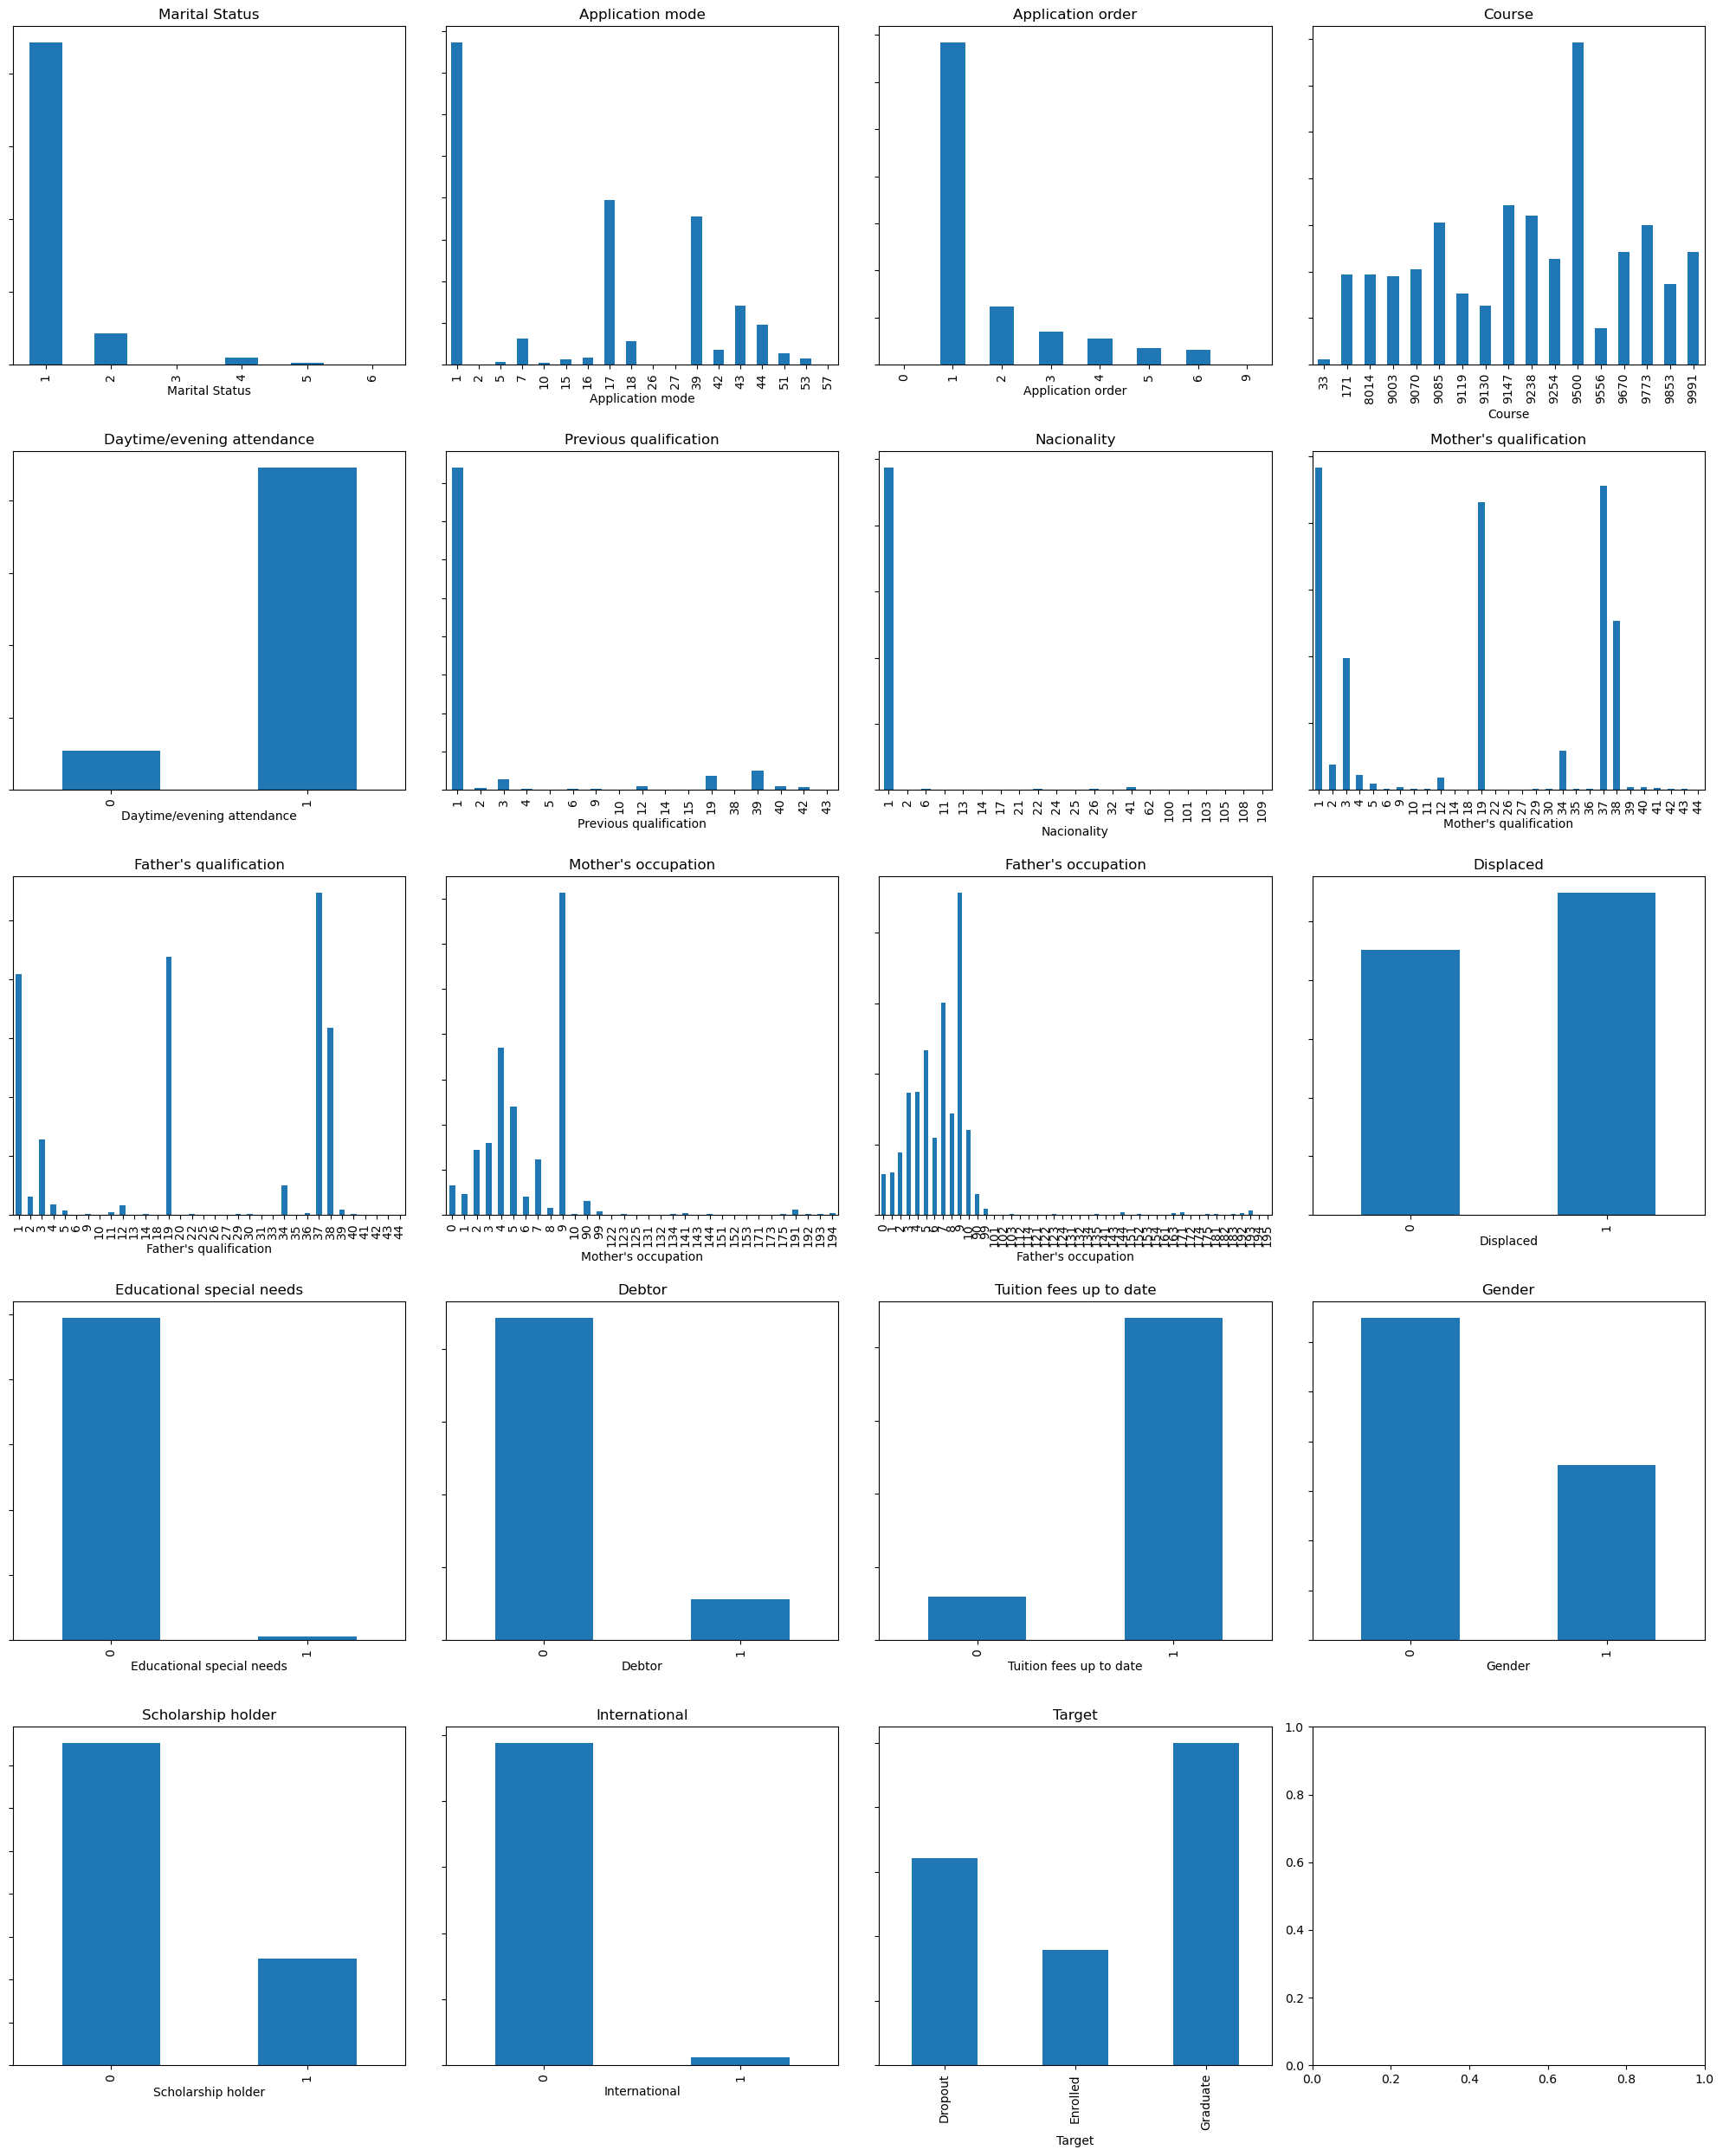

<Figure size 640x480 with 0 Axes>

In [10]:
# loop through categorical columns and create barplot for each
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    row_idx = i // 4
    col_idx = i % 4
    vc = df_raw[col].value_counts(normalize=True)
    vc = vc.sort_index() # sort by category name
    vc.plot(kind="bar", ax=axes[row_idx, col_idx], rot=0)
    axes[row_idx, col_idx].set_title(col)
    for tick in axes[row_idx, col_idx].get_xticklabels():
        tick.set_rotation(90)
    for tick in axes[row_idx, col_idx].get_yticklabels():
        tick.set_visible(False)
fig.tight_layout()
plt.savefig('images/boxplotCatergricalCols.jpg', dpi=300)
plt.show()
plt.clf()